In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\Internship_2024\Cognifyz_Project\Dataset_Cognifyz.csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
# treating nul-values
df.dropna(inplace=True)
df.shape

(9542, 21)

In [6]:
# droping columns which are not relevent to the analysis
df.drop(columns=['Address', 'Locality', 'Locality Verbose', 'Switch to order menu'], inplace=True)
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df['City'] = df['City'].replace({'Bras�_lia': 'Brazilia', 'S��o Paulo': 'Sao Paulo', '��stanbul': 'Istanbul'})
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brazilia', 'Rio de Janeiro', 'Sao Paulo', 'Albany',
       'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
       'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
       'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
       'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
       'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
       'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
       'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
       'Monroe', 'Montville', 'Ojo Caliente', 'Orlando', 'Palm Cove',
       'Paynesville', 'Penola', 'Pensacola', 'Phillip Island',
       'Pocatello', 'Potrero', 'Princeton', 'Rest of Hawaii', 'Savannah',
       'Singapore', 'Sioux City', 'Tampa Bay', 'Tanunda', 'Trentham East',
       'Va

In [8]:
df['Currency'] = df['Currency'].replace({'Brazilian Real(R$)':'Brazilian Real(BRL)', 'Dollar($)':'Dollar(USD)', 'Pounds(��)':'Pounds(GBP)', 'NewZealand($)':'New Zealand(NZD)'})
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(BRL)', 'Dollar(USD)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'New Zealand(NZD)', 'Pounds(GBP)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

# Level 3

Task 1 : Restaurant Reviews
- Analyze the text reviews to identify the most common positive and negative keywords.
- Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [16]:
# count of different rating texts available in the dataset:
text_reviews = df['Rating text'].value_counts()
text_reviews.reset_index()

,Rating text,count
0,Average,3734
1,Not rated,2148
2,Good,2096
3,Very Good,1078
4,Excellent,300
5,Poor,186


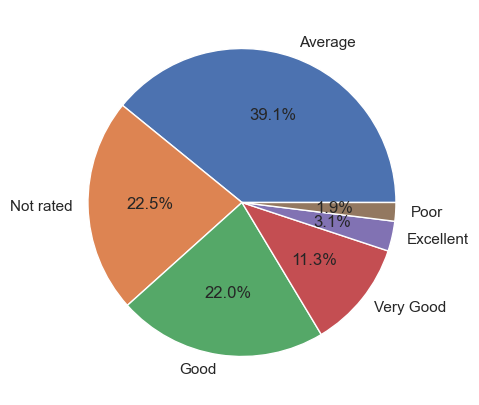

In [18]:
# ploting the text reviews on the 
plt.figure(figsize=(7, 5)) 
plt.pie(text_reviews.values, labels = text_reviews.index, autopct = "%.1f%%", radius = 1)
plt.show()

In [28]:
# Calculating average review length:
reviews = df['Rating text']
total_reviews = len(reviews)
avg_review_length = sum(len(review.split()) for review in reviews) / total_reviews
avg_review_length = round(avg_review_length, 2)
print('Average Review Length:', avg_review_length)

Average Review Length: 1.34


In [ ]:
# analysing the relationship between ratings and review length:
review_len_vs_rating = {}

for rating in df['Aggregate rating'].unique():
    filtered_reviews = df.loc[df['Aggregate rating'] == rating]['Rating text']
    total_length = 0
    total_reviews = len(filtered_reviews)
    
    for review in filtered_reviews:
        total_length += len(review.split())
    
    average_length = total_length / total_reviews
    review_len_vs_rating[rating] = average_length
    
print('Ratung v/s Average reviews length')
print(review_len_vs_rating)
    


In [33]:
# Calculate the average review length for each rating and store it in a dictionary
review_len_vs_rating = df.groupby('Aggregate rating')['Rating text'].apply(lambda x: x.str.split().str.len().mean()).to_dict()
print('Rating v/s Average reviews length')
print(review_len_vs_rating)

Rating v/s Average reviews length
{0.0: 2.0, 1.8: 1.0, 1.9: 1.0, 2.0: 1.0, 2.1: 1.0, 2.2: 1.0, 2.3: 1.0, 2.4: 1.0, 2.5: 1.0, 2.6: 1.0, 2.7: 1.0, 2.8: 1.0, 2.9: 1.0, 3.0: 1.0, 3.1: 1.0, 3.2: 1.0, 3.3: 1.0, 3.4: 1.0, 3.5: 1.0, 3.6: 1.0, 3.7: 1.0, 3.8: 1.0, 3.9: 1.0, 4.0: 2.0, 4.1: 2.0, 4.2: 2.0, 4.3: 2.0, 4.4: 2.0, 4.5: 1.0, 4.6: 1.0, 4.7: 1.0, 4.8: 1.0, 4.9: 1.0}


In [35]:
# Create a DataFrame from the review_len_vs_rating dictionary
df_review_len_vs_rating = pd.DataFrame(list(review_len_vs_rating.items()), columns=['Rating', 'Average Review Length'])
df_review_len_vs_rating

,Rating,Average Review Length
0,0.0,2.0
1,1.8,1.0
2,1.9,1.0
3,2.0,1.0
4,2.1,1.0
5,2.2,1.0
6,2.3,1.0
7,2.4,1.0
8,2.5,1.0
9,2.6,1.0


In [30]:
# Calculate the correlation between review length and rating
review_lengths = df['Rating text'].apply(lambda x: len(x.split()))
correlation = review_lengths.corr(df['Aggregate rating'])

print('Correlation between review length and rating:', correlation)

Correlation between review length and rating: -0.599682369752233


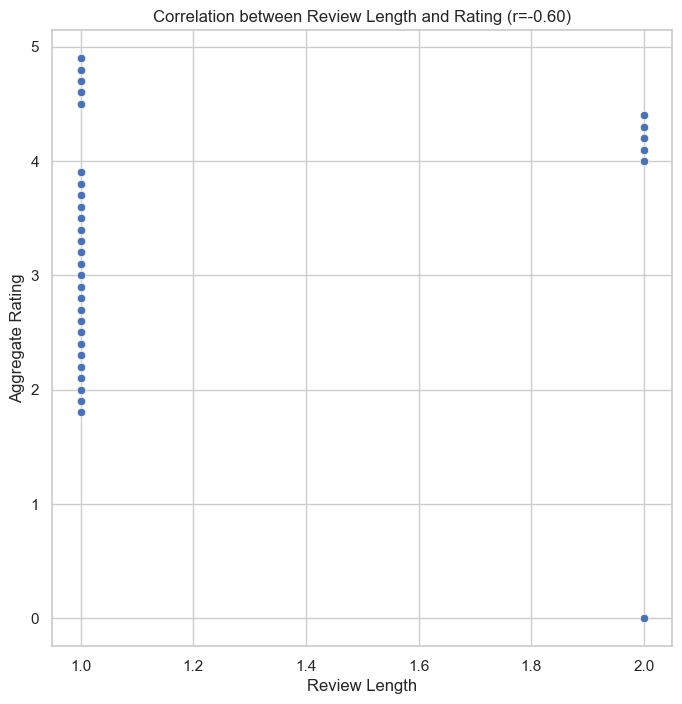

In [38]:
# Create a scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=review_lengths, y=df['Aggregate rating'])
plt.title(f'Correlation between Review Length and Rating (r={correlation:.2f})')
plt.xlabel('Review Length')
plt.ylabel('Aggregate Rating')
plt.show()

After analysing the "Rstaurant reviews" following are the observations:
- Most common positive review is 'Average' with 3734 counts amking it 39.1 % of the data, most common negative review is 'Poor' which is on 180 in count making just 1.9% of data, and there is 'Not rated' review which is 2148 in count, sencond largest portion of the whole data.
- With review length calculations we observed that there is negative reltion between review length and rating, meaning that as the length of the review increases, the aggregate rating tends to decrease.

Task 2 : Vote Analysis
- Identify the restaurants with the highest and lowest number of votes.
- Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [41]:
# restaurant with highest votes
df.loc[df['Votes'].idxmax()].reset_index()

,index,728
0,Restaurant ID,51705
1,Restaurant Name,Toit
2,Country Code,1
3,City,Bangalore
4,Longitude,77.640709
5,Latitude,12.979166
6,Cuisines,"Italian, American, Pizza"
7,Average Cost for two,2000
8,Currency,Indian Rupees(Rs.)
9,Has Table booking,No


In [42]:
# restaurant with lowest votes
df.loc[df['Votes'].idxmin()].reset_index()

,index,69
0,Restaurant ID,6710645
1,Restaurant Name,Cantinho da Gula
2,Country Code,30
3,City,Sao Paulo
4,Longitude,-46.675667
5,Latitude,-23.581
6,Cuisines,Brazilian
7,Average Cost for two,55
8,Currency,Brazilian Real(BRL)
9,Has Table booking,No


In [43]:
correlation = df['Votes'].corr(df['Aggregate rating'])
print("Correlation between Votes & Aggregate rating:", correlation)

Correlation between Votes & Aggregate rating: 0.3134741803250008


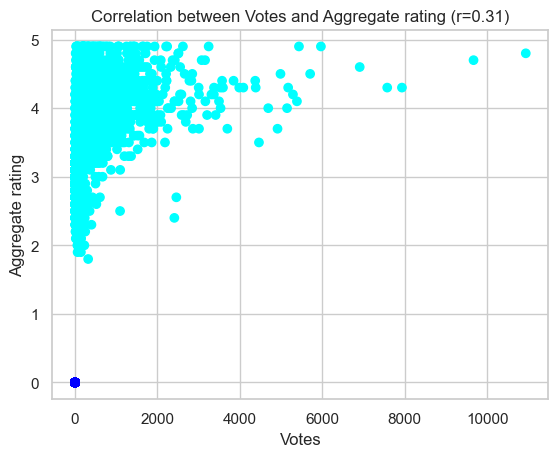

In [47]:
plt.scatter(df['Votes'], df['Aggregate rating'], c=np.where(df['Aggregate rating'] < 1.5, 'blue', 'cyan'))
plt.xlabel('Votes')
plt.ylabel('Aggregate rating')
plt.title('Correlation between Votes and Aggregate rating (r={:.2f})'.format(correlation))
plt.show()

Exploring the Vote analysis provides the following:
- Maximum votes (51705), bagged by Restaurant 'Toit' from Bangalore, India, and the minimum votes (0) for restaurant 'Cantinho da Gula' of Sao Paulo, Brazil.
- The correlation coefficient (r=0.31) confirms this weak positive correlation, shows a weak positive correlation between the number of votes and the aggregate rating

Task 3 : Price Range vs Online Delivery & Table Booking
- Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
- Determine if higher-priced restaurants are more likely to offer these services.

In [82]:
# analysing the relationship between price range and the availability of online delivery and table booking.

price_vs_onlinedelivery = df.groupby('Price range')['Has Online delivery'].value_counts().unstack()
price_vs_tablebooking = df.groupby('Price range')['Has Table booking'].value_counts().unstack()

print("Price v/s Online Delivery")
print (price_vs_onlinedelivery)
print("")  # added an empty line
print("Price v/s Table Booking")
print (price_vs_tablebooking)

Price v/s Online Delivery
Has Online delivery    No   Yes
Price range                    
1                    3737   701
2                    1827  1286
3                     994   411
4                     533    53

Price v/s Table Booking
Has Table booking    No  Yes
Price range                 
1                  4437    1
2                  2874  239
3                   761  644
4                   312  274


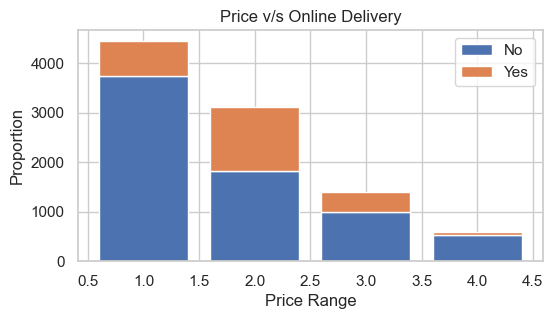

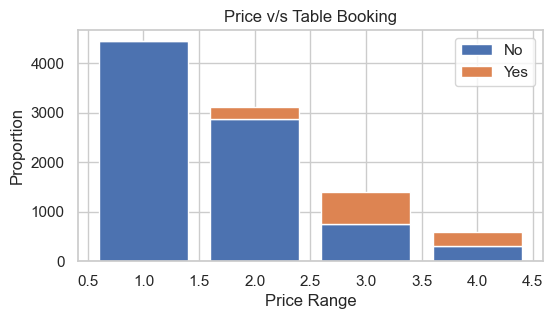

In [92]:
plt.figure(figsize=(6, 3))
plt.bar(price_vs_onlinedelivery.index, price_vs_onlinedelivery['No'], label='No')
plt.bar(price_vs_onlinedelivery.index, price_vs_onlinedelivery['Yes'], bottom=price_vs_onlinedelivery['No'], label='Yes')
plt.xlabel('Price Range')
plt.ylabel('Proportion')
plt.title('Price v/s Online Delivery')
plt.legend()
plt.show()

# Plot Price v/s Table Booking
plt.figure(figsize=(6, 3))
plt.bar(price_vs_tablebooking.index, price_vs_tablebooking['No'], label='No')
plt.bar(price_vs_tablebooking.index, price_vs_tablebooking['Yes'], bottom=price_vs_tablebooking['No'], label='Yes')
plt.xlabel('Price Range')
plt.ylabel('Proportion')
plt.title('Price v/s Table Booking')
plt.legend()
plt.show()

In [85]:
# high-priced restaurants:
hpr = df.loc[df['Price range'] > df['Price range'].median()]
hpr.reset_index()

,index,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314
1,1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591
2,2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270
3,3,6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365
4,4,6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,9545,5915054,Baltazar,208,Istanbul,28.981103,41.025785,"Burger, Izgara",90,Turkish Lira(TL),No,No,No,3,4.3,Green,Very Good,870
1987,9546,5915730,Naml۱ Gurme,208,Istanbul,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788
1988,9547,5908749,Ceviz A��ac۱,208,Istanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034
1989,9548,5915807,Huqqa,208,Istanbul,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661


In [86]:
# counting high priced restaurants with online delivery and table booking:
hpr_vs_onlinedelivery = hpr['Has Online delivery'].value_counts()
hpr_vs_tablebooking = hpr['Has Table booking'].value_counts()

print("\nHigh-Priced restaurants v/s Online Delivery:")
print(hpr_vs_onlinedelivery)
print("\nHigh-Priced restaurants v/s Table Booking:")
print(hpr_vs_tablebooking)


High-Priced restaurants v/s Online Delivery:
Has Online delivery
No     1527
Yes     464
Name: count, dtype: int64

High-Priced restaurants v/s Table Booking:
Has Table booking
No     1073
Yes     918
Name: count, dtype: int64


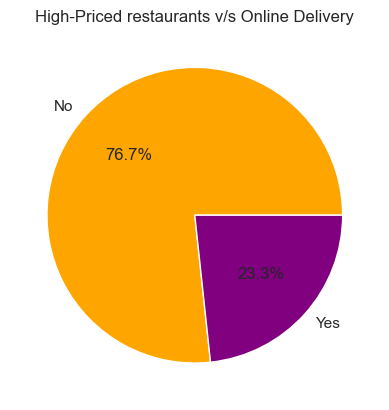

In [96]:
# ploting it on graph to have the visual
plt.pie(hpr_vs_onlinedelivery.values, labels = hpr_vs_onlinedelivery.index, autopct='%1.1f%%', colors= ["orange", "purple"])
plt.title("High-Priced restaurants v/s Online Delivery")
plt.show()

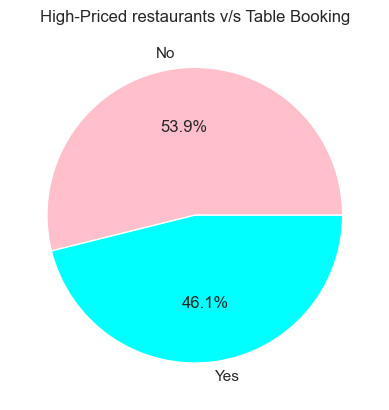

In [101]:
plt.pie(hpr_vs_tablebooking.values, labels = hpr_vs_tablebooking.index, autopct='%1.1f%%', colors= ["pink", "cyan"])
plt.title("High-Priced restaurants v/s Table Booking")
plt.show()

The analysis on Price range v/s online delivery and table booking gives following insight:
- The proportion of restaurants with online delivery (Yes) increases as the price range increases, with the highest proportion in price range 2 and,
The proportion of restaurants with table booking (Yes) increases as the price range increases, with the highest proportion in price ranges 3 and 4.
- Out of 1991 High priced restaurants only 464 (23.3%) restaurants provide online delivery, whereas 918 (46.1%) high-priced restaurants provide table booking.